In [32]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [33]:
train = pd.read_csv('./train.csv')

In [34]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [36]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [37]:
print train[train['Age'] > 60][['Sex', 'Pclass', 'Age', 'Survived']]

        Sex  Pclass   Age  Survived
33     male       2  66.0         0
54     male       1  65.0         0
96     male       1  71.0         0
116    male       3  70.5         0
170    male       1  61.0         0
252    male       1  62.0         0
275  female       1  63.0         1
280    male       3  65.0         0
326    male       3  61.0         0
438    male       1  64.0         0
456    male       1  65.0         0
483  female       3  63.0         1
493    male       1  71.0         0
545    male       1  64.0         0
555    male       1  62.0         0
570    male       2  62.0         1
625    male       1  61.0         0
630    male       1  80.0         1
672    male       2  70.0         0
745    male       1  70.0         0
829  female       1  62.0         1
851    male       3  74.0         0


In [38]:
train.groupby(['Sex', 'Pclass'])['PassengerId'].count()

Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
Name: PassengerId, dtype: int64

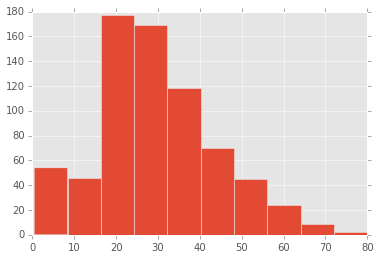

In [39]:
train['Age'].hist()

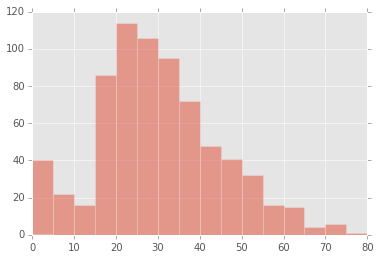

In [40]:
train['Age'].dropna().hist(bins=16, range=(0, 80), alpha=0.5)

**Cleaning the data**

In [41]:
train['Gender'] = 4

In [42]:
train['Gender'] = train['Sex'].map({'female': 0, 'male': 1}).astype(int)

In [43]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
dtype: int64

In [44]:
train['Embarked'] = train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [45]:
train.groupby(['Sex', 'Pclass'])['Age'].apply(np.mean)

Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64

In [46]:
train['AgeFill'] = train.groupby(['Sex', 'Pclass'])['Age'].transform('mean')
mask = train['Age'].isnull()
train.ix[mask, 'Age'] = train.ix[mask, 'AgeFill']

In [47]:
train['AgeIsNull'] = train['Age'].isnull().astype(int)

**Feature Engineering**

In [48]:
train['FamilySize'] = train['Parch'] + train['SibSp']

In [49]:
train['Age*Class'] = train['Age'] * train['Pclass']

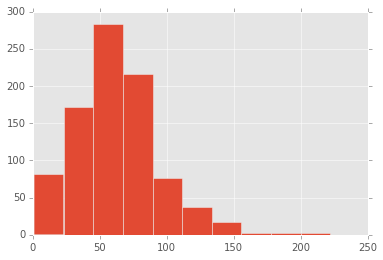

In [50]:
train['Age*Class'].hist()

**Final Preparation**

In [51]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked       float64
Gender           int64
AgeFill        float64
AgeIsNull        int64
FamilySize       int64
Age*Class      float64
dtype: object

In [52]:
train.dtypes[train.dtypes.map(lambda x: x=='object')]

Name      object
Sex       object
Ticket    object
Cabin     object
dtype: object

In [53]:
train = train.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'AgeFill'], axis=1)
train = train[['Survived', 'Pclass', 'Gender']]

In [54]:
train = train.dropna()
train.head()

,Survived,Pclass,Gender
0,0,3,1
1,1,1,0
2,1,3,0
3,1,1,0
4,0,3,1


In [55]:
# cols = train.columns.tolist()
# cols = cols[1:2] + cols[0:1] + cols[2::]
# train = train[cols]
# train.head()

In [56]:
train_data = train.values

**Predict**

In [57]:
test = pd.read_csv('./test.csv')

In [58]:
test['Embarked'] = test['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
test['Gender'] = test['Sex'].map({'female': 0, 'male': 1})
test['AgeFill'] = test.groupby(['Gender', 'Pclass'])['Age'].transform(np.mean)
mask = test['Age'].isnull()
test.ix[mask, 'Age'] = test.ix[mask, 'AgeFill']
test['AgeIsNull'] = mask.astype(int)
test['FareFill'] = test.groupby('Pclass')['Fare'].transform(np.mean)
mask = test['Fare'].isnull()
test.ix[mask, 'Fare'] = test.ix[mask, 'FareFill']
test = test.drop('FareFill', axis=1)
test['FamilySize'] = test['Parch'] + test['SibSp']
test['Age*Class'] = test['Age'] * test['Pclass']
test = test.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'AgeFill'], axis=1)
test = test[['Pclass', 'Gender']]
test.head()

,Pclass,Gender
0,3,1
1,3,0
2,2,1
3,3,1
4,3,0


In [59]:
test_data = test.values

In [60]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100)

forest = forest.fit(train_data[0::, 1::], train_data[0::, 0])

output = forest.predict(test_data)

In [61]:
test = pd.read_csv('./test.csv')
test['Survived'] = output
test[['PassengerId', 'Survived']].to_csv('./predict.csv', index=False)

In [62]:
pd.read_csv('./predict.csv')

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,0
9,901,0


TypeError: score() takes at least 3 arguments (1 given)